In [16]:
# @title Python Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.lines import Line2D

In [17]:
# @title Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# @title Load Protein Features File

# @markdown Do you want to load the default MORC2 protein features file from GitHub
# @markdown or upload your own protein features from Google Drive?
input_type = 'github' #@param ["github", "local"]

# @markdown If you chose to upload the data locally from your drive, enter the
# @markdown file path for it beginning with "drive/MyDrive" to reach your Drive's home.
file_path = 'drive/MyDrive/G2P Demo/G2P_MORC2_Q9Y6X9_protein_features.csv' # @param {type:"string"}

if input_type == 'github':
    local_file_path = 'G2P_MORC2_Q9Y6X9_protein_features.csv'
    !wget -O $local_file_path https://github.com/broadinstitute/g2papi/raw/main/examples/ex2_variant_feature_characterization/G2P_MORC2_Q9Y6X9_protein_features.csv
    df = pd.read_csv(local_file_path)
    display(df.head(5))
else:
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        display(df.head(5))
    else:
        print(f"File not found at path: {file_path}")

--2025-03-12 17:26:36--  https://github.com/broadinstitute/g2papi/raw/main/examples/ex2_variant_feature_characterization/G2P_MORC2_Q9Y6X9_protein_features.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/broadinstitute/g2papi/main/examples/ex2_variant_feature_characterization/G2P_MORC2_Q9Y6X9_protein_features.csv [following]
--2025-03-12 17:26:36--  https://raw.githubusercontent.com/broadinstitute/g2papi/main/examples/ex2_variant_feature_characterization/G2P_MORC2_Q9Y6X9_protein_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210080 (205K) [text/plain]
Saving to: ‘G2P_MORC2_Q9Y

,residueId,AA,Amino acid residues,Missense (gnomAD),Missense (ClinVar),"Secondary structure (PDBe/SIFTS) ([object Object],[object Object],[object Object])",Secondary structure (DSSP 3-state)*,Secondary structure (DSSP 9-state)*,Accessible surface area (Å²)*,Phi angle (degrees)*,...,Druggability score (fpocket)*,Intra-chain Hydrogen bond (PDB),Intra-chain Hydrogen bond (AlphaFold2),Intra-chain Non-bonded interaction (PDB),Intra-chain Non-bonded interaction (AlphaFold2),Intra-chain Salt bridge (PDB),Intra-chain Salt bridge (AlphaFold2),Inter-chain Hydrogen bond (PDB),Inter-chain Non-bonded interaction (PDB),Inter-chain Salt bridge (PDB)
0,1,M,Methionine,NaN,NaN,NaN,C (loop/coil),C (loop/coil),241,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B:M1-A:E138 (PDB: 5OF9),NaN
1,2,A,Alanine,p.Ala2Val; p.Ala2Gly,NaN,NaN,C (loop/coil),C (loop/coil),72,-80.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B:A2-A:E138 (PDB: 5OF9),NaN
2,3,F,Phenylalanine,p.Phe3Leu,NaN,NaN,C (loop/coil),S (bend),195,-81.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B:F3-A:E138 (PDB: 5OF9),B:F3-A:E138 (PDB: 5OF9),NaN
3,4,T,Threonine,p.Thr4Ser; p.Thr4Ala,NaN,NaN,C (loop/coil),S (bend),84,-146.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,N,Asparagine,p.Asn5Ser,NaN,NaN,C (loop/coil),C (loop/coil),117,-72.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# @markdown Secondary Structure Barplot Function

def secondary_structure_barplot(df_filtered, xcolumn, xname):
    plt.figure(figsize=(10, 6))

    # Function to split mutations and create expanded rows
    def expand_mutations(df, column_name, source_name):
        df_valid = df[df[column_name].notna() & (df[column_name] != '')].copy()

        df_valid['mutations'] = df_valid[column_name].str.split(';')
        df_expanded = df_valid.explode('mutations')
        df_expanded = df_expanded[df_expanded['mutations'].str.strip() != '']

        df_expanded['source'] = source_name
        return df_expanded

    # Expand gnomAD (control) mutations
    gnomad_expanded = expand_mutations(df_filtered, 'Missense (gnomAD)', 'Control (gnomAD)')
    total_gnomad = gnomad_expanded.shape[0]  # Total number of individual mutations

    # Expand ClinVar (case/pathogenic) mutations
    clinvar_expanded = expand_mutations(df_filtered, 'Missense (ClinVar)', 'Pathogenic (ClinVar)')
    total_clinvar = clinvar_expanded.shape[0]  # Total number of individual mutations

    # Combine expanded data
    combined_expanded = pd.concat([gnomad_expanded, clinvar_expanded])

    # Count mutations per secondary structure category and source
    count_data = combined_expanded.groupby([xcolumn, 'source']).size().reset_index(name='count')

    # Calculate fractions
    if total_gnomad > 0:
        count_data.loc[count_data['source'] == 'Control (gnomAD)', 'fraction'] = (
            count_data[count_data['source'] == 'Control (gnomAD)']['count'] / total_gnomad
        ) * 100
        print(total_gnomad)
    if total_clinvar > 0:
        count_data.loc[count_data['source'] == 'Pathogenic (ClinVar)', 'fraction'] = (
            count_data[count_data['source'] == 'Pathogenic (ClinVar)']['count'] / total_clinvar
        ) * 100
        print(total_clinvar)

    # Plot the fractions
    sns.barplot(data=count_data, x=xcolumn, y='fraction', hue='source',
                palette={'Control (gnomAD)': 'darkblue', 'Pathogenic (ClinVar)': 'darkred'})

    plt.xlabel(xname)
    plt.ylabel('Fraction of Variants (%)')
    plt.title(f"{xname} Variant Distribution")
    plt.legend(title='Variant Source')
    # plt.savefig(plot_name)

981
30


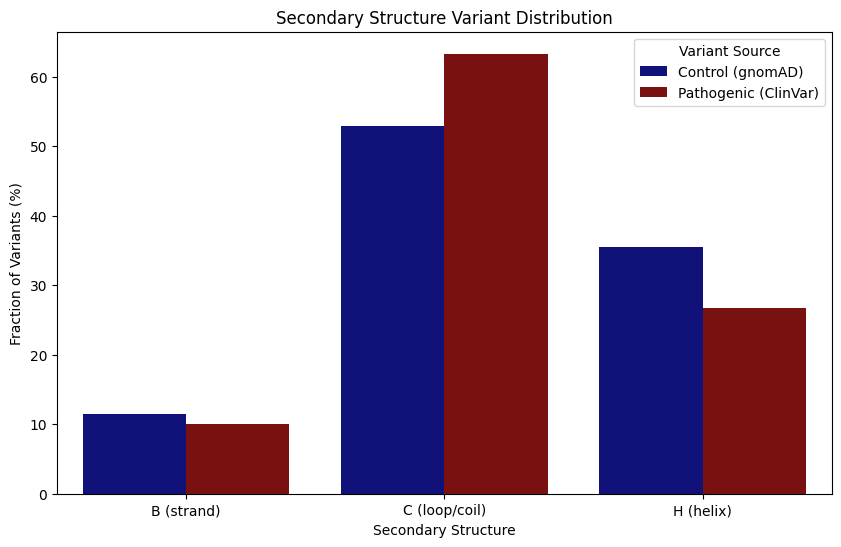

In [20]:
# @title Secondary Structure Barplot

secondary_structure_barplot(
    df_filtered=df,
    xcolumn='Secondary structure (DSSP 3-state)*',
    xname='Secondary Structure'
)

In [21]:
# @markdown Inter-chain Interactions Barplot Function

def interactions_barplot(df_filtered):

    plt.figure(figsize=(14, 6))  # Increased width to accommodate four categories

    # Define the interaction columns to analyze
    interaction_columns = [
        "Inter-chain Hydrogen bond (PDB)",
        "Inter-chain Non-bonded interaction (PDB)",
        "Inter-chain Salt bridge (PDB)"
    ]
    interaction_labels = ["Hydrogen Bond", "Non-bonded Interaction", "Salt Bridge"]

    # Function to split mutations and associate with interactions
    def expand_mutations_with_interactions(df, mutation_col, source_name):
        # Filter rows with non-empty mutations
        df_valid = df[df[mutation_col].notna() & (df[mutation_col] != '')].copy()
        # Split mutations by semicolon and explode
        df_valid['mutations'] = df_valid[mutation_col].str.split(';')
        df_expanded = df_valid.explode('mutations')
        # Remove empty or whitespace-only mutation entries
        df_expanded = df_expanded[df_expanded['mutations'].str.strip() != '']
        df_expanded['source'] = source_name
        # Check presence of each interaction type
        for col, label in zip(interaction_columns, interaction_labels):
            df_expanded[label] = df_expanded[col].notna() & (df_expanded[col] != '')
        return df_expanded

    # Expand mutations for gnomAD and ClinVar
    gnomad_expanded = expand_mutations_with_interactions(df_filtered, 'Missense (gnomAD)', 'Control (gnomAD)')
    clinvar_expanded = expand_mutations_with_interactions(df_filtered, 'Missense (ClinVar)', 'Pathogenic (ClinVar)')

    # Combine data
    combined_data = pd.concat([gnomad_expanded, clinvar_expanded])

    # Calculate total mutations per source
    total_gnomad = gnomad_expanded.shape[0]
    total_clinvar = clinvar_expanded.shape[0]

    # Count mutations for each interaction type and determine 'No Interaction'
    count_data = []
    for source in ['Control (gnomAD)', 'Pathogenic (ClinVar)']:
        source_data = combined_data[combined_data['source'] == source]
        for label in interaction_labels:
            count = source_data[label].sum()  # Count True values
            count_data.append({'interaction': label, 'source': source, 'count': count})
        # Add 'No Interaction' category: mutations with no interactions in any of the three types
        no_interaction_count = source_data[
            ~source_data[interaction_labels[0]] &
            ~source_data[interaction_labels[1]] &
            ~source_data[interaction_labels[2]]
        ].shape[0]
        count_data.append({'interaction': 'No Interaction', 'source': source, 'count': no_interaction_count})

    count_df = pd.DataFrame(count_data)

    # Calculate fractions ensuring they sum to 100% for each source
    if total_gnomad > 0:
        count_df.loc[count_df['source'] == 'Control (gnomAD)', 'fraction'] = (
            count_df[count_df['source'] == 'Control (gnomAD)']['count'] / total_gnomad
        ) * 100
    if total_clinvar > 0:
        count_df.loc[count_df['source'] == 'Pathogenic (ClinVar)', 'fraction'] = (
            count_df[count_df['source'] == 'Pathogenic (ClinVar)']['count'] / total_clinvar
        ) * 100

    # Plot the fractions
    sns.barplot(data=count_df, x='interaction', y='fraction', hue='source',
                palette={'Control (gnomAD)': 'darkblue', 'Pathogenic (ClinVar)': 'darkred'})

    plt.xlabel('Inter-chain Interaction Type')
    plt.ylabel('Fraction of Variants (%)')
    plt.title(f"Inter-chain Interactions Variant Distribution")
    plt.legend(title='Variant Source')
    # plt.savefig(plot_name)

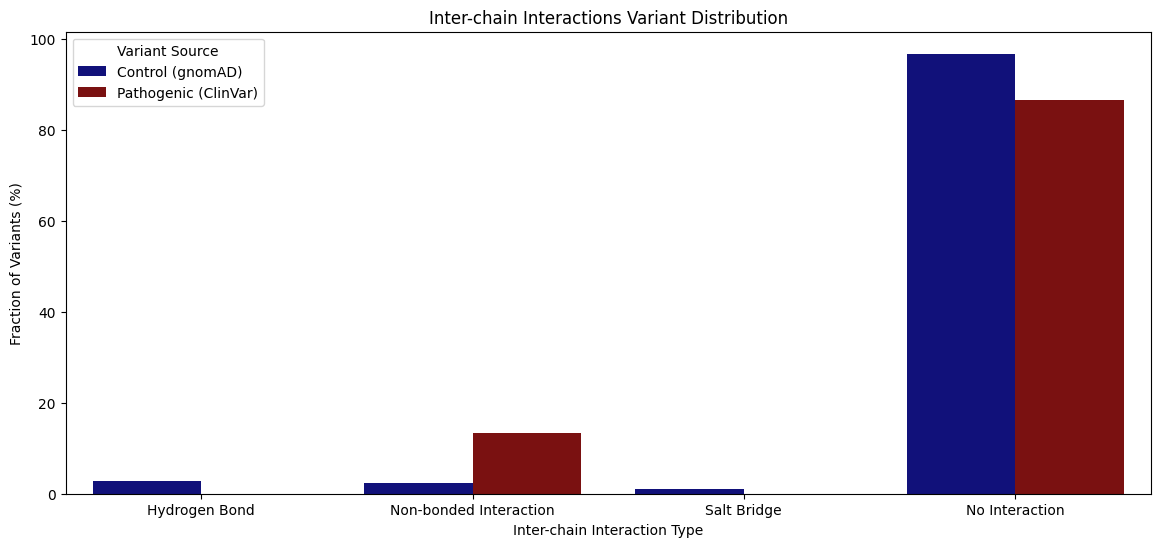

In [22]:
# @title Interactions Barplot

interactions_barplot(df_filtered=df)

In [23]:
# @markdown ASA vs. pLDDT Scatterplot Function

def ASA_vs_pLDDT_scatterplot(df_filtered):
    # Expand mutations for gnomAD and ClinVar
    def expand_mutations(df, mutation_col, source_name):
        df_valid = df[df[mutation_col].notna() & (df[mutation_col] != '')].copy()
        df_valid['mutations'] = df_valid[mutation_col].str.split(';')
        df_expanded = df_valid.explode('mutations')
        df_expanded = df_expanded[df_expanded['mutations'].str.strip() != '']
        df_expanded['source'] = source_name
        return df_expanded

    gnomad_expanded = expand_mutations(df_filtered, 'Missense (gnomAD)', 'Control (gnomAD)')
    clinvar_expanded = expand_mutations(df_filtered, 'Missense (ClinVar)', 'Pathogenic (ClinVar)')
    combined_data = pd.concat([gnomad_expanded, clinvar_expanded])

    # Color map
    color_map = {'Control (gnomAD)': 'darkblue', 'Pathogenic (ClinVar)': 'darkred'}
    colors = combined_data['source'].map(color_map)

    plt.figure(figsize=(10, 6))
    plt.scatter(
        combined_data['AlphaFold confidence (pLDDT)'],
        combined_data['Accessible surface area (Å²)*'],
        c=colors,
        alpha=0.7,
        s=50
    )

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Control (gnomAD)',
               markerfacecolor='darkblue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Pathogenic (ClinVar)',
               markerfacecolor='darkred', markersize=10)
    ]

    plt.legend(handles=legend_elements, title="Variant Source")
    plt.xlabel('AlphaFold pLDDT')
    plt.ylabel('Accessible Surface Area (Å²)')
    plt.title(f"ASA vs. pLDDT Scatterplot")
    # plt.savefig(plot_name)

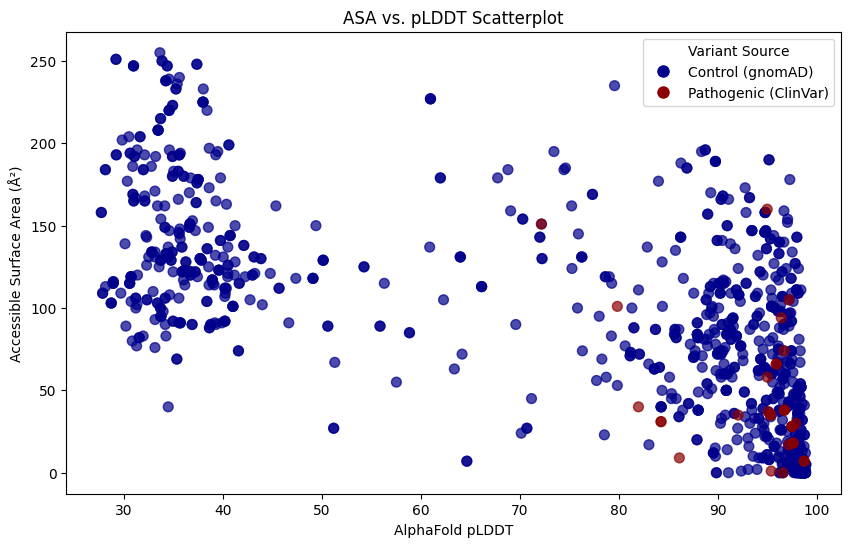

In [24]:
# @title ASA vs. pLDDT Scatterplot

ASA_vs_pLDDT_scatterplot(df_filtered=df)